In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import os
os.chdir('C:/Users/Patty/Desktop/PROGETTO BAYESIAN')
Data_Salary =  pd.read_csv('salaries.csv')
print(Data_Salary.head())

   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_size  
0               AU            S  
1               AU            S  
2       

In [3]:

df = Data_Salary.drop(columns=['salary', 'salary_currency'])    #tolgo le colonne che sono mangiate da salary in USD 
df = df[df['employment_type'] == 'FT']                          #tolgo le righe che non sono full_time poichè fuorivianti (se uno lavora part time ovvio guadagnerà molto meno)
df = df.drop(columns=['employment_type'])                       #a questo punto non ha senso avere questa colonna tanto sono tutti FULL TIME
df= df.drop(columns=['company_location'])                       #Levo la colonna company_location tanto è uguale a quella di dove vive l'impiegato

print(df)

       work_year experience_level                       job_title  \
0           2024               MI                  Data Scientist   
1           2024               MI                  Data Scientist   
4           2024               MI            Data Science Manager   
5           2024               MI            Data Science Manager   
6           2024               SE  Business Intelligence Engineer   
...          ...              ...                             ...   
16488       2021               SE                 Data Specialist   
16489       2020               SE                  Data Scientist   
16490       2021               MI        Principal Data Scientist   
16491       2020               EN                  Data Scientist   
16493       2021               SE            Data Science Manager   

       salary_in_usd employee_residence  remote_ratio company_size  
0             120000                 AU             0            S  
1              70000             

In [4]:

#Mi concentro sulla variabile 'job_title': ce ne sono troppi in troppa poca quantità, quindi metto un threshold
job_title_counts = df['job_title'].value_counts()
job_titles_to_keep = job_title_counts[job_title_counts >= 100].index
df = df[df['job_title'].isin(job_titles_to_keep)]
print(df['job_title'].value_counts())
print(df)

job_title
Data Engineer                     3451
Data Scientist                    3296
Data Analyst                      2421
Machine Learning Engineer         1700
Research Scientist                 527
Analytics Engineer                 431
Data Architect                     431
Applied Scientist                  431
Research Engineer                  306
Data Science                       268
Business Intelligence Engineer     246
Data Manager                       210
ML Engineer                        194
Business Intelligence Analyst      189
Machine Learning Scientist         138
Research Analyst                   123
Data Science Manager               122
AI Engineer                        117
Name: count, dtype: int64
       work_year experience_level                       job_title  \
0           2024               MI                  Data Scientist   
1           2024               MI                  Data Scientist   
4           2024               MI            Data Scien

In [5]:

#Stesso discorso di sopra ma per la variabile employee residence


job_residence_counts = df['employee_residence'].value_counts()
job_residence_to_keep = job_residence_counts[job_residence_counts >= 50].index
df = df[df['employee_residence'].isin(job_residence_to_keep)]
print(df['employee_residence'].value_counts())
print(df)

employee_residence
US    12983
GB      574
CA      389
ES      120
DE       62
FR       55
Name: count, dtype: int64
       work_year experience_level                       job_title  \
4           2024               MI            Data Science Manager   
5           2024               MI            Data Science Manager   
6           2024               SE  Business Intelligence Engineer   
7           2024               SE  Business Intelligence Engineer   
8           2024               SE                  Data Architect   
...          ...              ...                             ...   
16480       2020               MI                  Data Scientist   
16481       2020               MI                  Data Scientist   
16482       2020               MI                   Data Engineer   
16489       2020               SE                  Data Scientist   
16491       2020               EN                  Data Scientist   

       salary_in_usd employee_residence  remote_ratio 

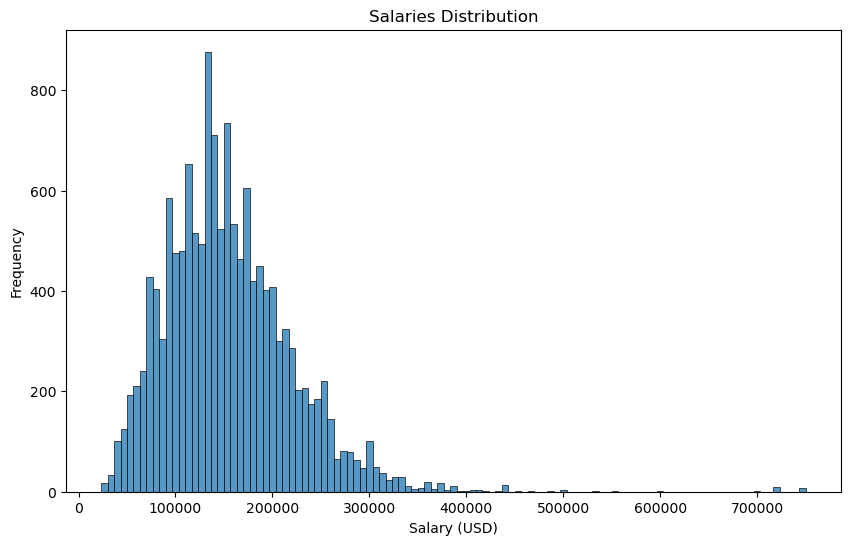

In [6]:
#istogramma della salary distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_in_usd')
plt.title('Salaries Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.savefig('foto1.jpg')

plt.show()

<Figure size 1000x600 with 0 Axes>

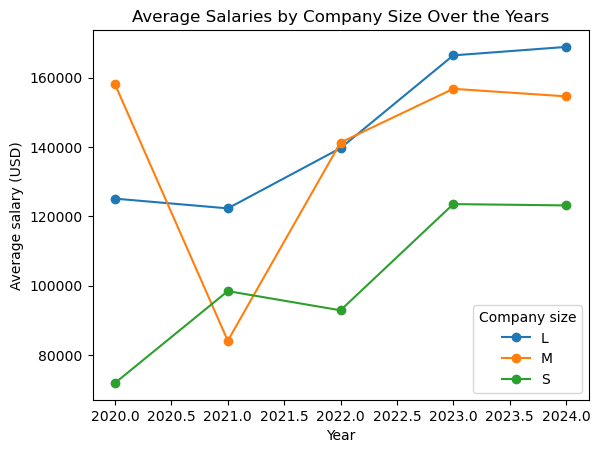

In [7]:
#stipendio medio in base all'anno e diviso per grandezza della compagnia

plt.figure(figsize=(10, 6))
df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack().plot(kind='line', marker='o')
plt.title('Average Salaries by Company Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Average salary (USD)')
plt.legend(title='Company size')
plt.savefig('foto2.jpg')
plt.show()

Experience Levels Ranked by Median Salary:
  experience_level  salary_in_usd
1               EX       183400.0
3               SE       158700.0
2               MI       121000.0
0               EN        86700.0


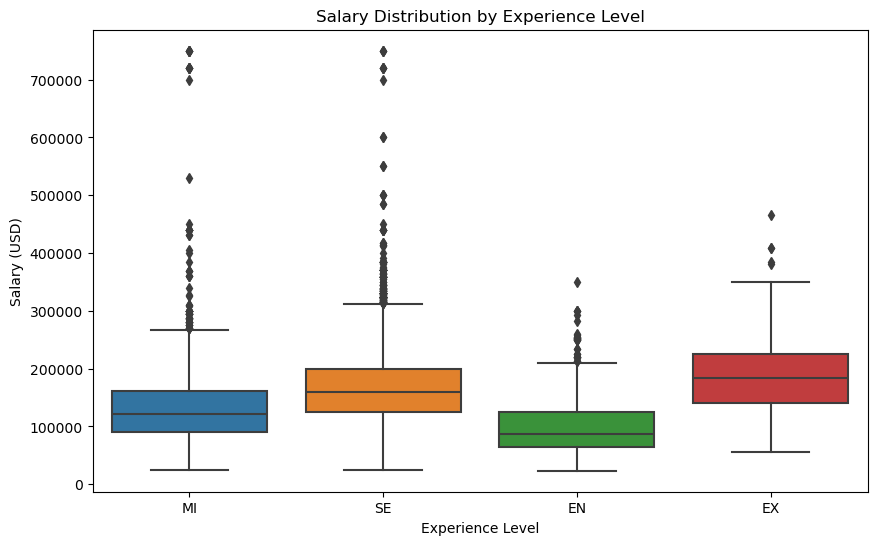

In [8]:
#boxplot della salary distribution diviso per Experience Level

experience_salaries = df.groupby('experience_level')['salary_in_usd'].median().reset_index()
experience_salaries_sorted = experience_salaries.sort_values('salary_in_usd', ascending=False)
Data_Salary_Ranked = pd.merge(Data_Salary, experience_salaries_sorted, on='experience_level')
experience_rank = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_rank'] = df['experience_level'].map(experience_rank)

print("Experience Levels Ranked by Median Salary:")
print(experience_salaries_sorted)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks([0, 1, 2, 3], ['MI', 'SE', 'EN', 'EX'])
plt.savefig('foto3.jpg')
plt.show()

Experience Levels Ranked by Median Salary:
  experience_level  salary_in_usd
1               EX       183400.0
3               SE       158700.0
2               MI       121000.0
0               EN        86700.0


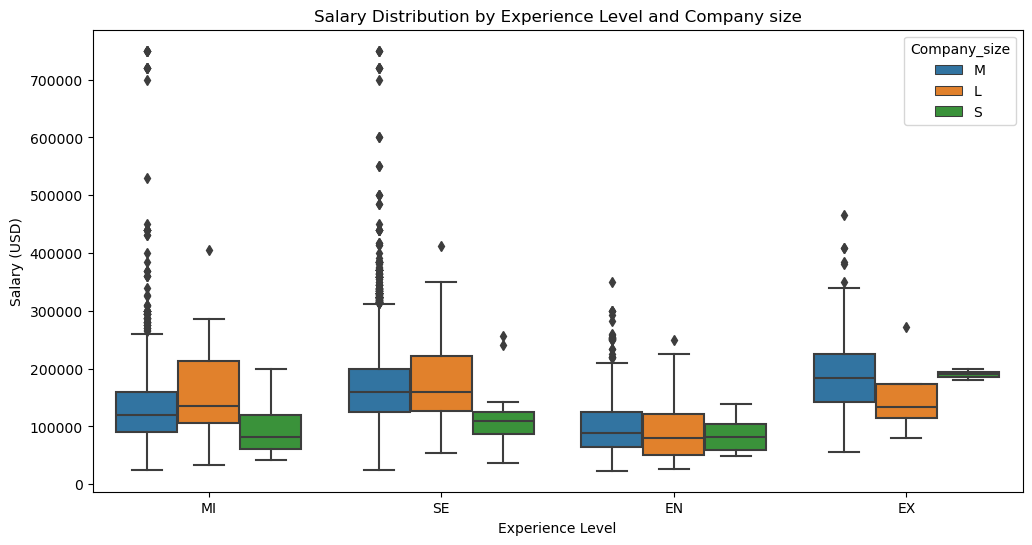

In [9]:
#stesso grafico di prima ma divido anche per la grandezza della compagnia


experience_salaries = df.groupby('experience_level')['salary_in_usd'].median().reset_index()
experience_salaries_sorted = experience_salaries.sort_values('salary_in_usd', ascending=False)
Data_Salary_Ranked = pd.merge(Data_Salary, experience_salaries_sorted, on='experience_level')
experience_rank = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_rank'] = df['experience_level'].map(experience_rank)

print("Experience Levels Ranked by Median Salary:")
print(experience_salaries_sorted)

plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='company_size', data=df)
plt.title('Salary Distribution by Experience Level and Company size')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.legend(title='Company_size')
plt.savefig('immagine.jpg')
plt.show()

In [10]:
print(df)

       work_year experience_level                       job_title  \
4           2024               MI            Data Science Manager   
5           2024               MI            Data Science Manager   
6           2024               SE  Business Intelligence Engineer   
7           2024               SE  Business Intelligence Engineer   
8           2024               SE                  Data Architect   
...          ...              ...                             ...   
16480       2020               MI                  Data Scientist   
16481       2020               MI                  Data Scientist   
16482       2020               MI                   Data Engineer   
16489       2020               SE                  Data Scientist   
16491       2020               EN                  Data Scientist   

       salary_in_usd employee_residence  remote_ratio company_size  \
4             240000                 US             0            M   
5             180000           

In [11]:
#Rimuovo gli outliers

def remove_outliers_std(df, column_name, threshold=1.75):
    mean = df[column_name].mean()
    std = df[column_name].std()
    df_cleaned = df[(df[column_name] >= mean - threshold * std) & (df[column_name] <= mean + threshold * std)]
    return df_cleaned

df_cleaned_std = remove_outliers_std(df, 'salary_in_usd')

Experience Levels Ranked by Median Salary:
  experience_level  salary_in_usd
1               EX       175762.0
3               SE       153200.0
2               MI       120000.0
0               EN        89030.0


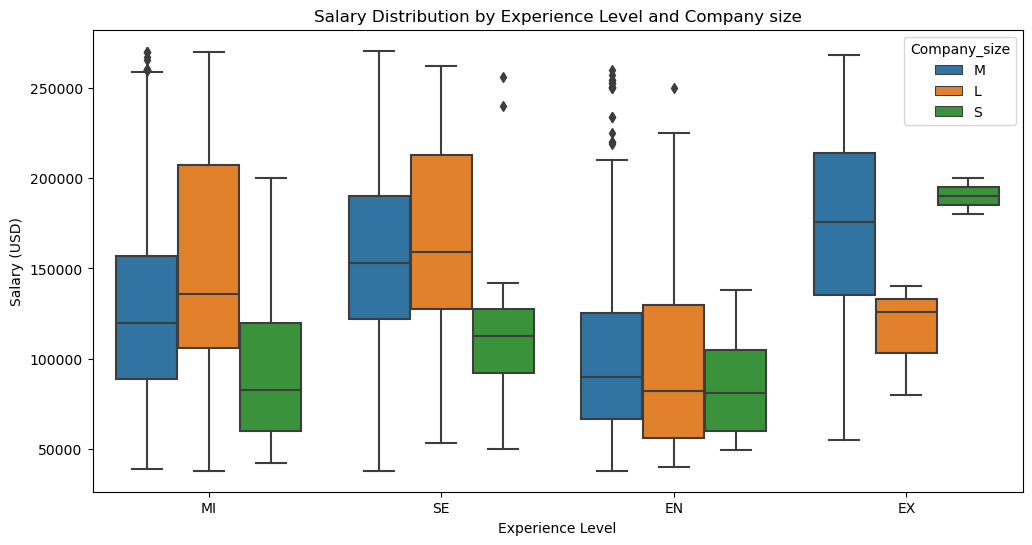

In [12]:
#stesso grafico di sopra ma con gli outliers rimossi

experience_salaries = df_cleaned_std.groupby('experience_level')['salary_in_usd'].median().reset_index()
experience_salaries_sorted = experience_salaries.sort_values('salary_in_usd', ascending=False)
Data_Salary_Ranked = pd.merge(Data_Salary, experience_salaries_sorted, on='experience_level')
experience_rank = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df_cleaned_std['experience_rank'] = df_cleaned_std['experience_level'].map(experience_rank)

print("Experience Levels Ranked by Median Salary:")
print(experience_salaries_sorted)

plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='company_size', data=df_cleaned_std)
plt.title('Salary Distribution by Experience Level and Company size')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.legend(title='Company_size')
plt.savefig('immagine.jpg')
plt.show()

In [13]:
print(df_cleaned_std)

       work_year experience_level                       job_title  \
4           2024               MI            Data Science Manager   
5           2024               MI            Data Science Manager   
6           2024               SE  Business Intelligence Engineer   
7           2024               SE  Business Intelligence Engineer   
8           2024               SE                  Data Architect   
...          ...              ...                             ...   
16479       2020               SE            Data Science Manager   
16480       2020               MI                  Data Scientist   
16481       2020               MI                  Data Scientist   
16482       2020               MI                   Data Engineer   
16491       2020               EN                  Data Scientist   

       salary_in_usd employee_residence  remote_ratio company_size  \
4             240000                 US             0            M   
5             180000           

In [23]:
# Install cmdstanpy module
#!pip install cmdstanpy

In [14]:
# Install cmdstan -- Just for the first time!
from cmdstanpy import install_cmdstan
install_cmdstan(compiler=True)

16:46:55 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\Patty\.cmdstan\RTools40


CmdStan install directory: C:\Users\Patty\.cmdstan
CmdStan version 2.35.0 already installed
Test model compilation


True

In [15]:

df = df_cleaned_std.drop(columns=['experience_rank'])    #rimuovo questa colonna che non mi serve 
df = df[df['company_size'] != 'S']                       #rimuovo S per motivi di quantità (scrivilo nel Latex)
print(df)

       work_year experience_level                       job_title  \
4           2024               MI            Data Science Manager   
5           2024               MI            Data Science Manager   
6           2024               SE  Business Intelligence Engineer   
7           2024               SE  Business Intelligence Engineer   
8           2024               SE                  Data Architect   
...          ...              ...                             ...   
16477       2021               MI                  Data Scientist   
16479       2020               SE            Data Science Manager   
16480       2020               MI                  Data Scientist   
16481       2020               MI                  Data Scientist   
16482       2020               MI                   Data Engineer   

       salary_in_usd employee_residence  remote_ratio company_size  
4             240000                 US             0            M  
5             180000             

In [16]:
#rendo le variabili categoriche delle dummy

#experience level
variabili_dummy = pd.get_dummies(df['experience_level'])
dataset = pd.concat([df, variabili_dummy], axis=1)
dataset.drop('experience_level', axis=1, inplace=True)

#residenza
variabili_dummy = pd.get_dummies(df['employee_residence'])
dataset = pd.concat([dataset, variabili_dummy], axis=1)
dataset.drop('employee_residence', axis=1, inplace=True)

#company_size 
variabili_dummy = pd.get_dummies(df['company_size'])
dataset = pd.concat([dataset, variabili_dummy], axis=1)
dataset.drop('company_size', axis=1, inplace=True)

#remote_ratio
#variabili_dummy = pd.get_dummies(df['remote_ratio'])
#dataset = pd.concat([dataset, variabili_dummy], axis=1)
#dataset.drop('remote_ratio', axis=1, inplace=True)

print(dataset)

       work_year                       job_title  salary_in_usd  remote_ratio  \
4           2024            Data Science Manager         240000             0   
5           2024            Data Science Manager         180000             0   
6           2024  Business Intelligence Engineer         202800             0   
7           2024  Business Intelligence Engineer         115000             0   
8           2024                  Data Architect         100000             0   
...          ...                             ...            ...           ...   
16477       2021                  Data Scientist          73000             0   
16479       2020            Data Science Manager         190200           100   
16480       2020                  Data Scientist         118000           100   
16481       2020                  Data Scientist         138350           100   
16482       2020                   Data Engineer         130800           100   

          EN     EX     MI 

In [1]:
#!pip install arviz
#!pip install cmdstanpy

In [17]:
#!pip install tensorflow-probability
#!pip install seaborn matplotlib

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.9 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.2/6.9 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/6.9 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/6.9 MB 2.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.9 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/6.9 MB 3.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/6.9 MB 3.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.1/6.9 MB 3.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.2/6.9 MB 3.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/6.9 MB 3.4 MB/s eta 0:00:02
   -------- ------------------------------- 1.5/6.9 MB 3.3 MB/s eta 0:00:02
   --------- -------------

In [17]:
# Create folder to store .stan files
import os
if not os.path.exists("./stan"):
    os.mkdir("./stan")

# Import modules
import numpy as np
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
# Import functions
from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [18]:
#porto la remote_ratio tra 0 e 1

dataset.remote_ratio=dataset.remote_ratio/100;
print(dataset)

       work_year                       job_title  salary_in_usd  remote_ratio  \
4           2024            Data Science Manager         240000           0.0   
5           2024            Data Science Manager         180000           0.0   
6           2024  Business Intelligence Engineer         202800           0.0   
7           2024  Business Intelligence Engineer         115000           0.0   
8           2024                  Data Architect         100000           0.0   
...          ...                             ...            ...           ...   
16477       2021                  Data Scientist          73000           0.0   
16479       2020            Data Science Manager         190200           1.0   
16480       2020                  Data Scientist         118000           1.0   
16481       2020                  Data Scientist         138350           1.0   
16482       2020                   Data Engineer         130800           1.0   

          EN     EX     MI 

In [19]:
#standardizzo la mia variabile target

mean_salary_in_usd= dataset['salary_in_usd'].mean()
std_salary_in_usd = dataset['salary_in_usd'].std()
dataset['salary_in_usd'] = (dataset['salary_in_usd'] - mean_salary_in_usd) / std_salary_in_usd
print(dataset)

       work_year                       job_title  salary_in_usd  remote_ratio  \
4           2024            Data Science Manager       1.788391           0.0   
5           2024            Data Science Manager       0.639839           0.0   
6           2024  Business Intelligence Engineer       1.076289           0.0   
7           2024  Business Intelligence Engineer      -0.604426           0.0   
8           2024                  Data Architect      -0.891564           0.0   
...          ...                             ...            ...           ...   
16477       2021                  Data Scientist      -1.408412           0.0   
16479       2020            Data Science Manager       0.835093           1.0   
16480       2020                  Data Scientist      -0.546998           1.0   
16481       2020                  Data Scientist      -0.157448           1.0   
16482       2020                   Data Engineer      -0.301974           1.0   

          EN     EX     MI 

In [20]:
#nel caso voglio essere piu rapido

#sample_df = dataset.sample(n=4000, random_state=1)
#dataset=sample_df
#print(dataset)

       work_year                  job_title  salary_in_usd  remote_ratio  \
9710        2023             Data Scientist      -1.082989           1.0   
386         2024          Research Engineer       0.563269           0.0   
11261       2023             Data Scientist      -0.202433           1.0   
16050       2022              Data Engineer      -0.642711           0.0   
14162       2023              Data Engineer      -0.336430           0.0   
...          ...                        ...            ...           ...   
10352       2023  Machine Learning Engineer       1.531881           0.0   
2897        2024             Data Scientist      -0.129691           0.0   
14891       2022             Data Architect       0.047186           1.0   
9512        2023              Data Engineer      -1.069590           0.0   
4863        2024         Research Scientist      -0.755652           0.0   

          EN     EX     MI     SE     CA     DE     ES     FR     GB    US  \
9710   Fa

In [21]:
#elimino gli anni con troppi pochi valori(sono 2020 e 2021)

work_year_counts = dataset['work_year'].value_counts()
work_year_to_keep = work_year_counts[work_year_counts >= 100].index
dataset = dataset[dataset['work_year'].isin(work_year_to_keep)]
print(dataset['work_year'].value_counts())
print(dataset)

work_year
2023    2108
2024    1461
2022     405
Name: count, dtype: int64
       work_year                  job_title  salary_in_usd  remote_ratio  \
9710        2023             Data Scientist      -1.082989           1.0   
386         2024          Research Engineer       0.563269           0.0   
11261       2023             Data Scientist      -0.202433           1.0   
16050       2022              Data Engineer      -0.642711           0.0   
14162       2023              Data Engineer      -0.336430           0.0   
...          ...                        ...            ...           ...   
10352       2023  Machine Learning Engineer       1.531881           0.0   
2897        2024             Data Scientist      -0.129691           0.0   
14891       2022             Data Architect       0.047186           1.0   
9512        2023              Data Engineer      -1.069590           0.0   
4863        2024         Research Scientist      -0.755652           0.0   

          EN

In [21]:
#definisco la variabile target e la design matrix per il mio modello

y = dataset.salary_in_usd.values
X = dataset[['remote_ratio','EX','MI','SE','DE','ES','FR','GB','US','M']]
X.insert(0, 'Alpha', 1)
print(X)

       Alpha  remote_ratio     EX     MI     SE     DE     ES     FR     GB  \
4          1           0.0  False   True  False  False  False  False  False   
5          1           0.0  False   True  False  False  False  False  False   
6          1           0.0  False  False   True  False  False  False  False   
7          1           0.0  False  False   True  False  False  False  False   
8          1           0.0  False  False   True  False  False  False   True   
...      ...           ...    ...    ...    ...    ...    ...    ...    ...   
16217      1           1.0  False  False  False  False  False  False  False   
16218      1           1.0  False   True  False  False  False  False  False   
16227      1           1.0  False   True  False  False  False   True  False   
16238      1           0.5  False  False   True  False  False  False  False   
16246      1           1.0  False  False  False  False  False  False  False   

          US      M  
4       True   True  
5      

In [22]:
mod1 = """
data {
  int<lower=0> N;                   // Numero di osservazioni
  int<lower=0> K;                   // Numero di variabili predittive
  vector[N] y;                      // Vettore delle variabili target
  matrix[N, K] X;                   // Matrice delle variabili predittive                      
}

parameters {                       // Intercept
  vector[K] beta;                   // Coefficienti delle variabili predittive
  real<lower=0> sigma;              // Deviazione standard noise
  vector<lower=0>[K] sigma_beta;
  
}


transformed parameters {
    vector[N] mu;
    mu = X * beta;
}

model {
  // Priors
  beta ~ normal(0, sigma_beta);             // Prior per i coefficienti
  sigma_beta ~ inv_gamma(1, 3);
  sigma ~ cauchy(0, 1);  // Prior Cauchy per la deviazione standard del rumore

             
  
  // Likelihood
  y ~ normal(mu, sigma);   // Likelihood della regressione lineare

}
generated quantities {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = normal_lpdf(y[j] | X[j] * beta, sigma);
  }
}
 
"""


# Write stan model to file
stan_file = "./stan/modello1.stan"
with open(stan_file, "w") as f:
    print(mod1, file=f)

# Compile stan model
mod1 = CmdStanModel(stan_file=stan_file)

21:36:13 - cmdstanpy - INFO - compiling stan file C:\Users\Patty\Desktop\PROGET~1\stan\modello1.stan to exe file C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\modello1.exe
21:36:43 - cmdstanpy - INFO - compiled model executable: C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\modello1.exe


In [23]:

mod1_data = {
    "N": len(y),
    "K": X.shape[1],
    "y": y,   
    "X": X
}

mod1_fit = mod1.sample(mod1_data, chains=4, parallel_chains=4, 
                             iter_warmup=400, iter_sampling=4000,show_console=True)

mod1_data = az.from_cmdstanpy(mod1_fit)

21:36:44 - cmdstanpy - INFO - Chain [1] start processing
21:36:44 - cmdstanpy - INFO - Chain [2] start processing
21:36:44 - cmdstanpy - INFO - Chain [3] start processing
21:36:44 - cmdstanpy - INFO - Chain [4] start processing


Chain [4] method = sample (Default)
Chain [4] sample
Chain [3] method = sample (Default)
Chain [3] sample
Chain [3] num_samples = 4000
Chain [3] num_warmup = 400
Chain [3] save_warmup = false (Default)
Chain [3] thin = 1 (Default)
Chain [3] adapt
Chain [4] num_samples = 4000
Chain [3] engaged = true (Default)
Chain [3] gamma = 0.05 (Default)
Chain [3] delta = 0.8 (Default)
Chain [3] kappa = 0.75 (Default)
Chain [3] t0 = 10 (Default)
Chain [3] init_buffer = 75 (Default)
Chain [3] term_buffer = 50 (Default)
Chain [4] num_warmup = 400
Chain [4] save_warmup = false (Default)
Chain [4] thin = 1 (Default)
Chain [4] adapt
Chain [4] engaged = true (Default)
Chain [4] gamma = 0.05 (Default)
Chain [4] delta = 0.8 (Default)
Chain [4] kappa = 0.75 (Default)
Chain [4] t0 = 10 (Default)
Chain [4] init_buffer = 75 (Default)
Chain [4] term_buffer = 50 (Default)
Chain [4] window = 25 (Default)
Chain [4] save_metric = false (Default)
Chain [4] algorithm = hmc (Default)
Chain [4] hmc
Chain [4] engine = n

Chain [1] Iteration:  100 / 4400 [  2%]  (Warmup)
Chain [1] Iteration:  200 / 4400 [  4%]  (Warmup)
Chain [1] Iteration:  300 / 4400 [  6%]  (Warmup)
Chain [3] Iteration:  100 / 4400 [  2%]  (Warmup)
Chain [4] Iteration:  100 / 4400 [  2%]  (Warmup)
Chain [2] Iteration:  100 / 4400 [  2%]  (Warmup)
Chain [1] Iteration:  400 / 4400 [  9%]  (Warmup)
Chain [1] Iteration:  401 / 4400 [  9%]  (Sampling)
Chain [4] Iteration:  200 / 4400 [  4%]  (Warmup)
Chain [3] Iteration:  200 / 4400 [  4%]  (Warmup)
Chain [2] Iteration:  200 / 4400 [  4%]  (Warmup)
Chain [4] Iteration:  300 / 4400 [  6%]  (Warmup)
Chain [3] Iteration:  300 / 4400 [  6%]  (Warmup)
Chain [2] Iteration:  300 / 4400 [  6%]  (Warmup)
Chain [1] Iteration:  500 / 4400 [ 11%]  (Sampling)
Chain [4] Iteration:  400 / 4400 [  9%]  (Warmup)
Chain [4] Iteration:  401 / 4400 [  9%]  (Sampling)
Chain [3] Iteration:  400 / 4400 [  9%]  (Warmup)
Chain [3] Iteration:  401 / 4400 [  9%]  (Sampling)
Chain [2] Iteration:  400 / 4400 [  9%]  (

Chain [1] Iteration: 3900 / 4400 [ 88%]  (Sampling)
Chain [3] Iteration: 4000 / 4400 [ 90%]  (Sampling)
Chain [2] Iteration: 4000 / 4400 [ 90%]  (Sampling)
Chain [4] Iteration: 4000 / 4400 [ 90%]  (Sampling)
Chain [1] Iteration: 4000 / 4400 [ 90%]  (Sampling)
Chain [3] Iteration: 4100 / 4400 [ 93%]  (Sampling)
Chain [2] Iteration: 4100 / 4400 [ 93%]  (Sampling)
Chain [4] Iteration: 4100 / 4400 [ 93%]  (Sampling)
Chain [1] Iteration: 4100 / 4400 [ 93%]  (Sampling)
Chain [3] Iteration: 4200 / 4400 [ 95%]  (Sampling)
Chain [2] Iteration: 4200 / 4400 [ 95%]  (Sampling)
Chain [4] Iteration: 4200 / 4400 [ 95%]  (Sampling)
Chain [1] Iteration: 4200 / 4400 [ 95%]  (Sampling)
Chain [3] Iteration: 4300 / 4400 [ 97%]  (Sampling)
Chain [2] Iteration: 4300 / 4400 [ 97%]  (Sampling)
Chain [4] Iteration: 4300 / 4400 [ 97%]  (Sampling)
Chain [1] Iteration: 4300 / 4400 [ 97%]  (Sampling)


21:44:33 - cmdstanpy - INFO - Chain [3] done processing


Chain [3] Iteration: 4400 / 4400 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 80.61 seconds (Warm-up)
Chain [3] 388.482 seconds (Sampling)
Chain [3] 469.092 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 


21:44:34 - cmdstanpy - INFO - Chain [2] done processing


Chain [2] Iteration: 4400 / 4400 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 83.377 seconds (Warm-up)
Chain [2] 386.908 seconds (Sampling)
Chain [2] 470.285 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 


21:44:36 - cmdstanpy - INFO - Chain [4] done processing


Chain [4] Iteration: 4400 / 4400 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 80.284 seconds (Warm-up)
Chain [4] 391.909 seconds (Sampling)
Chain [4] 472.193 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 


21:44:39 - cmdstanpy - INFO - Chain [1] done processing
21:44:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'modello1.stan', line 31, column 2 to column 24)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'modello1.stan', line 31, column 2 to column 24)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'modello1.stan', line 31, column 2 to column 24)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'modello1.stan', line 31, column 2 to column 24)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'modello1.stan', line 31, column 2 to column 24)


Chain [1] Iteration: 4400 / 4400 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 66.326 seconds (Warm-up)
Chain [1] 408.423 seconds (Sampling)
Chain [1] 474.749 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


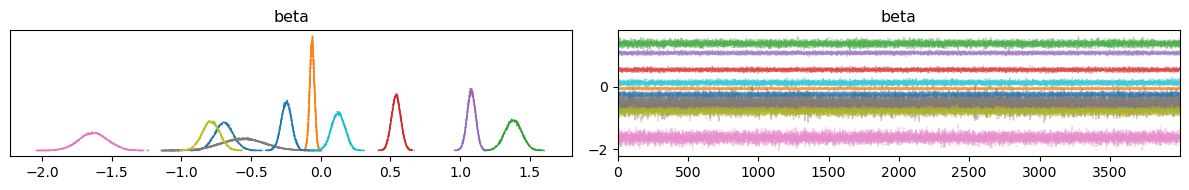

In [24]:
#grafico delle catene

az.plot_trace(mod1_data, var_names=["beta"])
plt.tight_layout()
plt.savefig('convergenzamodello1reduce.jpg')
plt.show()

In [25]:
#calcolo del WAIC e LOO

waic_out = az.waic(mod1_data, var_name='log_lik')
loo_out = az.loo(mod1_data, var_name='log_lik')
waic = waic_out.elpd_waic
loo = loo_out.elpd_loo
print(waic_out)
print(loo_out)

Computed from 16000 posterior samples and 13291 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -17500.86    73.37
p_waic       11.81        -
Computed from 16000 posterior samples and 13291 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -17500.86    73.37
p_loo       11.82        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     13291  100.0%
 (0.5, 0.7]   (ok)           0    0.0%
   (0.7, 1]   (bad)          0    0.0%
   (1, Inf)   (very bad)     0    0.0%



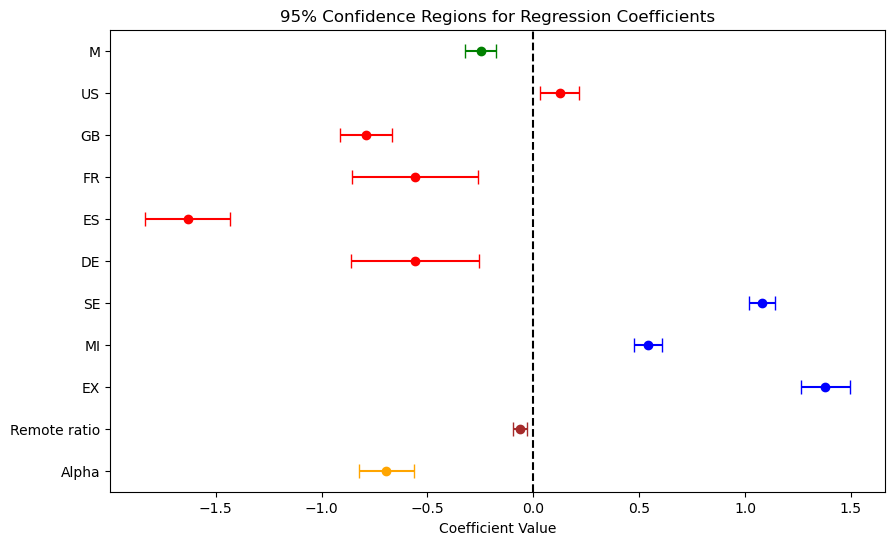

In [26]:
#Regioni di confidenza per i beta

import arviz as az
import numpy as np
import matplotlib.pyplot as plt

posterior_samples = mod1_data.posterior['beta'].values
beta_mean = np.mean(posterior_samples, axis=(0, 1))
beta_conf_int = np.percentile(posterior_samples, [2.5, 97.5], axis=(0, 1))
beta_names = ['Alpha','Remote ratio', 'EX', 'MI', 'SE','DE','ES','FR','GB','US','M']
colors = ['orange', 'brown', 'blue', 'blue', 'blue','red','red','red','red','red','green']
fig, ax = plt.subplots(figsize=(10, 6))


for i, (name, mean, ci, color) in enumerate(zip(beta_names, beta_mean, beta_conf_int.T, colors)):
    ax.errorbar(mean, i, xerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color=color, label=name if i == 0 else "", capsize=5)
 
ax.set_yticks(range(len(beta_names)))
ax.set_yticklabels(beta_names)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient Value')
ax.set_title('95% Confidence Regions for Regression Coefficients')
plt.savefig('confidenceregionsmodello1reduce.jpg')
plt.show()




In [22]:
mod2ss = """
data {
    int<lower=0> N;              // numero di osservazioni
    int<lower=0> p_fix;          // numero di covariate fisse
    int<lower=0> n_groups;       // numero di gruppi
    

    
    vector[N] Y;                  // variabile risposta
    matrix[N, p_fix] X;          // matrice di design per le covariate fisse
    matrix[N, n_groups] G;       // matrice di design per i gruppi

}

parameters {
    vector[p_fix] beta;            // coefficenti delle covariate fisse // deviazioni standard dei coefficenti
    vector<lower=0>[N] sigma;      // deviazioni standard delle osservazioni
    vector<lower=0>[p_fix] sigma_beta; 
       
    vector[n_groups] lambda_raw;   // parametri non scalati per i gruppi
    real lambda0;                  // intercetta per i gruppi
    real<lower=0> s0;              // scala per lambda_raw
}

transformed parameters {
    vector[n_groups] lambda;
    vector[N] mu;
    
    lambda = lambda0 + lambda_raw * s0;
    mu = X * beta + G * lambda;
}

model {
    // Vettorizzazione della distribuzione di Y
    Y ~ normal(mu, sigma); 

    
    beta ~ normal(0, sigma_beta);
    
    sigma_beta ~ inv_gamma(1, 3);
    sigma ~ inv_gamma(1, 3);
    lambda_raw ~ normal(0, 1);
    lambda0 ~ normal(0, 1);
    s0 ~ inv_gamma(1, 3);
}

generated quantities {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = normal_lpdf(Y[j] | mu[j] , sigma[j]);
  }
}

"""

# Write stan model to file
stan_file = "./stan/mod2ss.stan"
with open(stan_file, "w") as f:
    print(mod2ss, file=f)

# Compile stan model
mod2ss = CmdStanModel(stan_file=stan_file)

16:48:03 - cmdstanpy - INFO - compiling stan file C:\Users\Patty\Desktop\PROGET~1\stan\mod2ss.stan to exe file C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\mod2ss.exe
16:48:35 - cmdstanpy - INFO - compiled model executable: C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\mod2ss.exe


In [23]:
#definisco variabile target, design matrix e l'indicator matrix

y = dataset.salary_in_usd.values
X = dataset[['remote_ratio','EX','MI','SE','DE','ES','FR','GB','US','M']]
years = dataset.work_year.values
G = (years[:, np.newaxis] == np.unique(years)).astype(int)
X.insert(0, 'Alpha', 1)

print(X)
print(G)

       Alpha  remote_ratio     EX     MI     SE     DE     ES     FR     GB  \
9710       1           1.0  False   True  False  False  False  False  False   
386        1           0.0  False   True  False  False  False  False  False   
11261      1           1.0  False  False   True  False  False  False  False   
16050      1           0.0  False  False   True  False  False  False  False   
14162      1           0.0  False  False   True  False  False  False  False   
...      ...           ...    ...    ...    ...    ...    ...    ...    ...   
10352      1           0.0  False  False   True  False  False  False  False   
2897       1           0.0  False  False   True  False  False  False  False   
14891      1           1.0  False  False   True  False  False  False  False   
9512       1           0.0  False  False   True  False  False  False  False   
4863       1           0.0  False   True  False  False  False  False  False   

         US      M  
9710   True   True  
386    Tr

In [24]:
mod2ss_data = {
    "N": len(y),
    "p_fix": X.shape[1],
    "n_groups": G.shape[1],
    "Y": y,
    "X": X,
    "G": G
}


In [25]:
from cmdstanpy import CmdStanModel
stan_file = "./stan/mod2ss.stan"
mod2ss_fit = mod2ss.sample(data=mod2ss_data, chains=4, parallel_chains=4, 
                               iter_warmup=400, iter_sampling =1500 , adapt_delta=0.99 , show_console=True)
import arviz as az

mod2_data = az.from_cmdstanpy(mod2ss_fit)

16:48:35 - cmdstanpy - INFO - Chain [1] start processing
16:48:35 - cmdstanpy - INFO - Chain [2] start processing
16:48:35 - cmdstanpy - INFO - Chain [3] start processing
16:48:35 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 1500
Chain [2] num_warmup = 400
Chain [2] save_warmup = false (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = true (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.99
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = false (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [1] num_samples = 1500
Chain [1] num_warmup = 400
Chain [1] save_warmup = false (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = true (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.99
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50

Chain [3] Iteration:  300 / 1900 [ 15%]  (Warmup)
Chain [2] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [2] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [4] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [4] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [4] Iteration:  500 / 1900 [ 26%]  (Sampling)
Chain [1] Iteration:  500 / 1900 [ 26%]  (Sampling)
Chain [3] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [3] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [2] Iteration:  500 / 1900 [ 26%]  (Sampling)
Chain [4] Iteration:  600 / 1900 [ 31%]  (Sampling)
Chain [4] Iteration:  700 / 1900 [ 36%]  (Sampling)
Chain [1] Iteration:  600 / 1900 [ 31%]  (Sampling)
Chain [3] Iteration:  500 / 1900 [ 26%]  (Sampling)
Chain [2] Iteration:  600 / 1900 [ 31%]  (Sampling)
Chain [4] Iteration:  800 / 1900 [ 42%]  (Sampling)
Chain [4] Iteration:  900 / 1900 [ 47%]  (Sampling)
Chain [1] Iteration:  700 / 1900 [ 36%]  (Sampling)
Chain [3] Iteration:  600 / 1900 [ 31%]  (Sampling)
Chain [2] Iteration:

17:17:27 - cmdstanpy - INFO - Chain [4] done processing


Chain [4] 
Chain [4] Elapsed Time: 425.647 seconds (Warm-up)
Chain [4] 1306.04 seconds (Sampling)
Chain [4] 1731.68 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [2] Iteration: 1200 / 1900 [ 63%]  (Sampling)
Chain [1] Iteration: 1300 / 1900 [ 68%]  (Sampling)
Chain [3] Iteration: 1200 / 1900 [ 63%]  (Sampling)
Chain [2] Iteration: 1300 / 1900 [ 68%]  (Sampling)
Chain [1] Iteration: 1400 / 1900 [ 73%]  (Sampling)
Cha

17:32:47 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] 
Chain [1] Elapsed Time: 372.654 seconds (Warm-up)
Chain [1] 2278.74 seconds (Sampling)
Chain [1] 2651.39 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [3] Iteration: 1800 / 1900 [ 94%]  (Sampling)
Chain [2] Iteration: 1900 / 1900 [100%]  (Sampling)


17:33:58 - cmdstanpy - INFO - Chain [2] done processing


Chain [2] 
Chain [2] Elapsed Time: 400.47 seconds (Warm-up)
Chain [2] 2322.45 seconds (Sampling)
Chain [2] 2722.92 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [3] Iteration: 1900 / 1900 [100%]  (Sampling)


17:34:46 - cmdstanpy - INFO - Chain [3] done processing
17:34:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod2ss.stan', line 35, column 4 to column 26)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod2ss.stan', line 35, column 4 to column 26)


Chain [3] 
Chain [3] Elapsed Time: 538.372 seconds (Warm-up)
Chain [3] 2232.33 seconds (Sampling)
Chain [3] 2770.7 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 


17:34:53 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.1%)
	Chain 1 had 1384 iterations at max treedepth (92.3%)
	Chain 2 had 1500 iterations at max treedepth (100.0%)
	Chain 3 had 1500 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


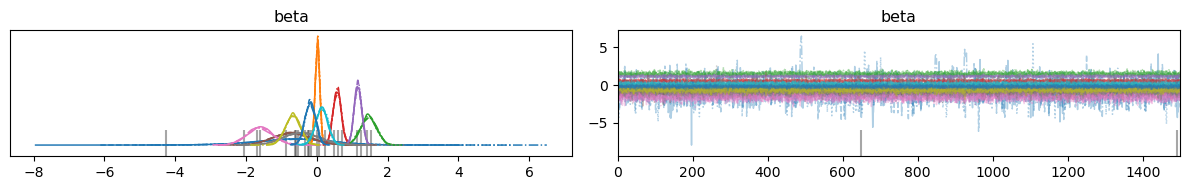

In [26]:
#plot catene

az.plot_trace(mod2_data,var_names=["beta"])
plt.tight_layout()
plt.savefig('convergenzamodello2reduce.jpg')
plt.show()

In [27]:
#calcolo WAIC e LOO

waic_out1 = az.waic(mod2_data, var_name='log_lik')
loo_out1 = az.loo(mod2_data, var_name='log_lik')
waic1 = waic_out1.elpd_waic
loo1 = loo_out1.elpd_loo
print(waic_out1)
print(loo_out1)

Computed from 6000 posterior samples and 3974 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -8558.04    11.90
p_waic     1836.88        -

There has been a warning during the calculation. Please check the results.
Computed from 6000 posterior samples and 3974 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -8729.49    11.99
p_loo     2008.33        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     2195   55.2%
 (0.5, 0.7]   (ok)       1660   41.8%
   (0.7, 1]   (bad)       118    3.0%
   (1, Inf)   (very bad)    1    0.0%



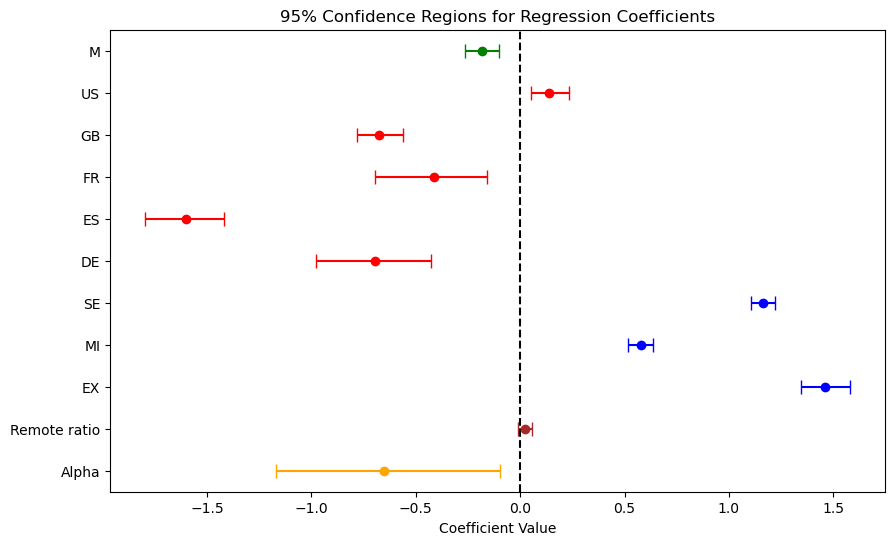

In [29]:
#Calcolo C.R. per i beta

posterior_samples = mod2_data.posterior['beta'].values
beta_mean = np.mean(posterior_samples, axis=(0, 1))
beta_conf_int = np.percentile(posterior_samples, [2.5, 97.5], axis=(0, 1))
beta_names = ['Alpha','Remote ratio', 'EX', 'MI', 'SE','DE','ES','FR','GB','US','M']
colors = ['orange', 'brown', 'blue', 'blue', 'blue','red','red','red','red','red','green']
fig, ax = plt.subplots(figsize=(10, 6))

for i, (name, mean, ci, color) in enumerate(zip(beta_names, beta_mean, beta_conf_int.T, colors)):
    ax.errorbar(mean, i, xerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color=color, label=name if i == 0 else "", capsize=5)

ax.set_yticks(range(len(beta_names)))
ax.set_yticklabels(beta_names)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient Value')
ax.set_title('95% Confidence Regions for Regression Coefficients')
plt.savefig('confidenceintervalsmodello2.jpg')
plt.show()

In [30]:
#Divido la variabile categorica 'Job Title' in 3 gruppi

def categorize_role(role):
    if 'Engineer' in role:
        return 'Ingegneri'
    elif 'Scientist' in role or 'Science' in role:
        return 'Scienziati'
    else:
        return 'Altro'

dataset['Gruppo'] = dataset['job_title'].apply(categorize_role)
dataset= dataset.drop(columns=['job_title'])
print(dataset)


       work_year  salary_in_usd  remote_ratio     EN     EX     MI     SE  \
9710        2023      -1.082989           1.0  False  False   True  False   
386         2024       0.563269           0.0  False  False   True  False   
11261       2023      -0.202433           1.0  False  False  False   True   
16050       2022      -0.642711           0.0  False  False  False   True   
14162       2023      -0.336430           0.0  False  False  False   True   
...          ...            ...           ...    ...    ...    ...    ...   
10352       2023       1.531881           0.0  False  False  False   True   
2897        2024      -0.129691           0.0  False  False  False   True   
14891       2022       0.047186           1.0  False  False  False   True   
9512        2023      -1.069590           0.0  False  False  False   True   
4863        2024      -0.755652           0.0  False  False   True  False   

          CA     DE     ES     FR     GB    US      L      M      Gruppo  


In [31]:
#preparo il dataset

y = dataset.salary_in_usd.values
X = dataset[['remote_ratio','EX','MI','SE','DE','ES','FR','GB','US','M']]
X.insert(0, 'Alpha', 1)
years = dataset.work_year.values
G = (years[:, np.newaxis] == np.unique(years)).astype(int)

gruppi = dataset.Gruppo.values
P = (gruppi[:, np.newaxis] == np.unique(gruppi)).astype(int)

print(X)
print(G)
print(P)

       Alpha  remote_ratio     EX     MI     SE     DE     ES     FR     GB  \
9710       1           1.0  False   True  False  False  False  False  False   
386        1           0.0  False   True  False  False  False  False  False   
11261      1           1.0  False  False   True  False  False  False  False   
16050      1           0.0  False  False   True  False  False  False  False   
14162      1           0.0  False  False   True  False  False  False  False   
...      ...           ...    ...    ...    ...    ...    ...    ...    ...   
10352      1           0.0  False  False   True  False  False  False  False   
2897       1           0.0  False  False   True  False  False  False  False   
14891      1           1.0  False  False   True  False  False  False  False   
9512       1           0.0  False  False   True  False  False  False  False   
4863       1           0.0  False   True  False  False  False  False  False   

         US      M  
9710   True   True  
386    Tr

In [32]:
mod3 = """
data {
    int<lower=0> N;              // numero di osservazioni
    int<lower=0> p_fix;          // numero di covariate fisse
    int<lower=0> n_groups1;       // numero di gruppi
    int<lower=0> n_groups2;
    
    vector[N] Y;                  // variabile risposta
    matrix[N, p_fix] X;          // matrice di design per le covariate fisse
    matrix[N, n_groups1] G;      // matrice di design per i gruppi
    matrix[N, n_groups2] P;
}

parameters {
    vector[p_fix] beta;            // coefficenti delle covariate fisse
    vector<lower=0>[p_fix] sigma_beta; // deviazioni standard dei coefficenti
    vector<lower=0>[N] sigma;      // deviazioni standard delle osservazioni
    
    vector[n_groups1] lambda_raw1;   // parametri non scalati per i gruppi
    real lambda0;                  // intercetta per i gruppi
    real<lower=0> s0;              // scala per lambda_raw
    
    vector[n_groups2] lambda_raw2;
    real lambda1;
    real<lower=0> s1;
}

transformed parameters {
    vector[n_groups1] lambda_gruppo1;
    vector[n_groups2] lambda_gruppo2;
    vector[N] mu;
    
    lambda_gruppo1 = lambda0 + lambda_raw1 * s0;
    lambda_gruppo2 = lambda1 + lambda_raw2 * s1;
    
    mu = X * beta + G * lambda_gruppo1 + P * lambda_gruppo2;
}

model {
    // Vettorizzazione della distribuzione di Y
    Y ~ normal(mu, sigma); 
    
    // Vettorizzazione della distribuzione di beta e sigma_beta
    beta ~ normal(0, sigma_beta);
    sigma_beta ~ inv_gamma(1, 3);  
    sigma ~ inv_gamma(1, 3);
    
    // Vettorizzazione della distribuzione di lambda_raw, lambda0 e s0
    lambda_raw1 ~ normal(0, 1);
    lambda0 ~ normal(0, 1);
    s0 ~ inv_gamma(1, 3); 
    
    lambda_raw2 ~ normal(0, 1);
    lambda1 ~ normal(0, 1);
    s1 ~ inv_gamma(1, 3); 

}

generated quantities {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = normal_lpdf(Y[j] | mu[j], sigma[j]);
  }
}
"""

# Write stan model to file
stan_file = "./stan/mod3.stan"
with open(stan_file, "w") as f:
    print(mod3, file=f)

# Compile stan model
mod3 = CmdStanModel(stan_file=stan_file)

17:41:00 - cmdstanpy - INFO - compiling stan file C:\Users\Patty\Desktop\PROGET~1\stan\mod3.stan to exe file C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\mod3.exe
17:41:37 - cmdstanpy - INFO - compiled model executable: C:\Users\Patty\Desktop\PROGETTO BAYESIAN\stan\mod3.exe


In [33]:
mod3_data = {
    "N": len(y),
    "p_fix": X.shape[1],
    "n_groups1": G.shape[1],
    "n_groups2": P.shape[1],
    "Y": y,
    "X": X,
    "G": G,
    "P": P
}

from cmdstanpy import CmdStanModel

stan_file = "./stan/mod3.stan"
mod3_fit = mod3.sample(data=mod3_data, chains=4, parallel_chains=4, 
                               iter_warmup=400, iter_sampling =1500, show_console=True, adapt_delta=0.99)
import arviz as az

mod3_data = az.from_cmdstanpy(mod3_fit)

17:41:37 - cmdstanpy - INFO - Chain [1] start processing
17:41:37 - cmdstanpy - INFO - Chain [2] start processing
17:41:37 - cmdstanpy - INFO - Chain [3] start processing
17:41:37 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1500
Chain [1] num_warmup = 400
Chain [1] save_warmup = false (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = true (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.99
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = false (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\Patty\AppData\Local\Temp\tmp76l41xc1\kj6oviya.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 95502
Chain [

Chain [4] Iteration:  100 / 1900 [  5%]  (Warmup)
Chain [3] Iteration:  100 / 1900 [  5%]  (Warmup)
Chain [1] Iteration:  100 / 1900 [  5%]  (Warmup)
Chain [2] Iteration:  100 / 1900 [  5%]  (Warmup)
Chain [4] Iteration:  200 / 1900 [ 10%]  (Warmup)
Chain [3] Iteration:  200 / 1900 [ 10%]  (Warmup)
Chain [1] Iteration:  200 / 1900 [ 10%]  (Warmup)
Chain [2] Iteration:  200 / 1900 [ 10%]  (Warmup)
Chain [3] Iteration:  300 / 1900 [ 15%]  (Warmup)
Chain [4] Iteration:  300 / 1900 [ 15%]  (Warmup)
Chain [1] Iteration:  300 / 1900 [ 15%]  (Warmup)
Chain [2] Iteration:  300 / 1900 [ 15%]  (Warmup)
Chain [3] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [3] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [4] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [4] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [1] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [1] Iteration:  401 / 1900 [ 21%]  (Sampling)
Chain [2] Iteration:  400 / 1900 [ 21%]  (Warmup)
Chain [2] Iteration:  401 / 1900 [ 21%]  (Sa

18:46:02 - cmdstanpy - INFO - Chain [3] done processing


Chain [3] 
Chain [3] Elapsed Time: 719.627 seconds (Warm-up)
Chain [3] 3145.26 seconds (Sampling)
Chain [3] 3864.89 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [4] Iteration: 1900 / 1900 [100%]  (Sampling)


18:46:25 - cmdstanpy - INFO - Chain [4] done processing


Chain [4] 
Chain [4] Elapsed Time: 744.508 seconds (Warm-up)
Chain [4] 3142.75 seconds (Sampling)
Chain [4] 3887.25 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [1] Iteration: 1900 / 1900 [100%]  (Sampling)


18:46:29 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] 
Chain [1] Elapsed Time: 749.54 seconds (Warm-up)
Chain [1] 3142.29 seconds (Sampling)
Chain [1] 3891.83 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [2] Iteration: 1900 / 1900 [100%]  (Sampling)


18:46:32 - cmdstanpy - INFO - Chain [2] done processing
18:46:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod3.stan', line 41, column 4 to column 26)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod3.stan', line 41, column 4 to column 26)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod3.stan', line 41, column 4 to column 26)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod3.stan', line 41, column 4 to column 26)
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'mod3.stan', line 41, column 4 to column 26)


Chain [2] 
Chain [2] Elapsed Time: 755.797 seconds (Warm-up)
Chain [2] 3139.14 seconds (Sampling)
Chain [2] 3894.94 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 


18:46:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1500 iterations at max treedepth (100.0%)
	Chain 2 had 1500 iterations at max treedepth (100.0%)
	Chain 3 had 1500 iterations at max treedepth (100.0%)
	Chain 4 had 1500 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


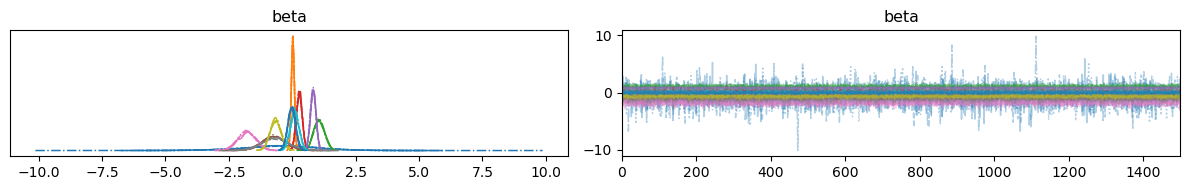

In [34]:
#Plot delle catene

az.plot_trace(mod3_data, var_names=["beta"])
plt.tight_layout()
plt.savefig('convergenzamodello3.jpg')
plt.show()

In [35]:
#Calcolo WAIC e LOO

waic_out2 = az.waic(mod3_data, var_name='log_lik')
loo_out2 = az.loo(mod3_data, var_name='log_lik')
waic2 = waic_out2.elpd_waic
loo2 = loo_out2.elpd_loo
print(waic_out2)
print(loo_out2)

Computed from 6000 posterior samples and 3974 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -8504.85    11.22
p_waic     1876.74        -

There has been a warning during the calculation. Please check the results.
Computed from 6000 posterior samples and 3974 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -8677.73    11.31
p_loo     2049.63        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     2124   53.4%
 (0.5, 0.7]   (ok)       1714   43.1%
   (0.7, 1]   (bad)       136    3.4%
   (1, Inf)   (very bad)    0    0.0%



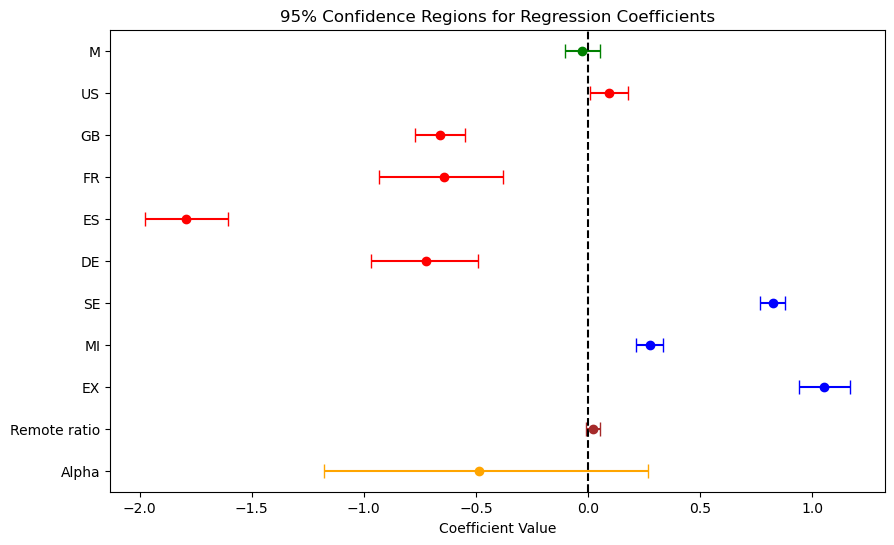

In [38]:
#C.R. per i Beta

posterior_samples = mod3_data.posterior['beta'].values
beta_mean = np.mean(posterior_samples, axis=(0, 1))
beta_conf_int = np.percentile(posterior_samples, [30, 70], axis=(0, 1))
beta_names = ['Alpha','Remote ratio', 'EX', 'MI', 'SE','DE','ES','FR','GB','US','M']
colors = ['orange', 'brown', 'blue', 'blue', 'blue','red','red','red','red','red','green']
fig, ax = plt.subplots(figsize=(10, 6))

for i, (name, mean, ci, color) in enumerate(zip(beta_names, beta_mean, beta_conf_int.T, colors)):
    ax.errorbar(mean, i, xerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color=color, label=name if i == 0 else "", capsize=5)

ax.set_yticks(range(len(beta_names)))
ax.set_yticklabels(beta_names)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient Value')
ax.set_title('95% Confidence Regions for Regression Coefficients')
plt.savefig('confidenceregionsmodello3.jpg')
plt.show()

In [41]:
#Calcolo WAIC e LOO per i 3 modelli e li confronto

waic_out1 = az.waic(mod1_data, var_name='log_lik')
loo_out1 = az.loo(mod1_data, var_name='log_lik')

waic_out2 = az.waic(mod2_data, var_name='log_lik')
loo_out2 = az.loo(mod2_data, var_name='log_lik')

waic_out3 = az.waic(mod3_data, var_name='log_lik')
loo_out3 = az.loo(mod3_data, var_name='log_lik')

waic_comparison = {
    "Model 1": waic_out1,
    "Model 2": waic_out2,
    "Model 3": waic_out3
}

loo_comparison = {
    "Model 1": loo_out1,
    "Model 2": loo_out2,
    "Model 3": loo_out3
}

waic_df = az.compare(waic_comparison, ic="waic")
print("WAIC Comparison:\n", waic_df)

loo_df = az.compare(loo_comparison, ic="loo")
print("LOO Comparison:\n", loo_df)


WAIC Comparison:
          rank     elpd_waic       p_waic     elpd_diff        weight  \
Model 1     0 -17500.856617    11.812804      0.000000  1.000000e+00   
Model 3     1 -28378.590718  6292.072617  10877.734102  1.495776e-08   
Model 2     2 -28558.034727  6181.691967  11057.178110  0.000000e+00   

                se        dse  warning scale  
Model 1  73.372406   0.000000    False   log  
Model 3  20.620341  56.435792     True   log  
Model 2  21.689816  52.722192     True   log  
LOO Comparison:
          rank      elpd_loo        p_loo     elpd_diff        weight  \
Model 1     0 -17500.861919    11.818107      0.000000  1.000000e+00   
Model 3     1 -28948.308330  6861.790229  11447.446410  0.000000e+00   
Model 2     2 -29133.966387  6757.623628  11633.104468  8.017510e-10   

                se        dse  warning scale  
Model 1  73.372455   0.000000    False   log  
Model 3  20.991762  56.622143     True   log  
Model 2  21.829743  52.849805     True   log  


In [42]:
# Stampo i risultati del confronto

print("WAIC Comparison:\n", waic_df)
print("LOO Comparison:\n", loo_df)


WAIC Comparison:
          rank     elpd_waic       p_waic     elpd_diff        weight  \
Model 1     0 -17500.856617    11.812804      0.000000  1.000000e+00   
Model 3     1 -28378.590718  6292.072617  10877.734102  1.495776e-08   
Model 2     2 -28558.034727  6181.691967  11057.178110  0.000000e+00   

                se        dse  warning scale  
Model 1  73.372406   0.000000    False   log  
Model 3  20.620341  56.435792     True   log  
Model 2  21.689816  52.722192     True   log  
LOO Comparison:
          rank      elpd_loo        p_loo     elpd_diff        weight  \
Model 1     0 -17500.861919    11.818107      0.000000  1.000000e+00   
Model 3     1 -28948.308330  6861.790229  11447.446410  0.000000e+00   
Model 2     2 -29133.966387  6757.623628  11633.104468  8.017510e-10   

                se        dse  warning scale  
Model 1  73.372455   0.000000    False   log  
Model 3  20.991762  56.622143     True   log  
Model 2  21.829743  52.849805     True   log  


In [43]:
#definisco funzione predittiva modello 1

def predictive_normal_glm(x_star, chains, ygrid):
    """Evaluates P(y=k | x^*, chains) for k in ygrid using a Normal distribution with variance 1"""
    betas = np.vstack(chains.posterior.beta)
    means = betas @ x_star  
    out = np.mean(tfd.Normal(loc=means, scale=1).prob(ygrid[:, np.newaxis]), axis=1)
    return out

In [44]:
#definisco funzione predittiva modello 3

def predictive_normal_glmm(x_star, group1,group2, chains, ygrid):
    betas = np.vstack(chains.posterior.beta)
    lambdas = np.vstack(chains.posterior["lambda_gruppo1"])
    thetas = np.vstack(chains.posterior["lambda_gruppo2"])
    means = betas @ x_star + lambdas[:, group1] + thetas[:, group2]
    out = np.mean(tfd.Normal(loc=means, scale=1).prob(ygrid[:, np.newaxis]), axis=1)
    return out

Text(0, 0.5, 'P(y | x*)')

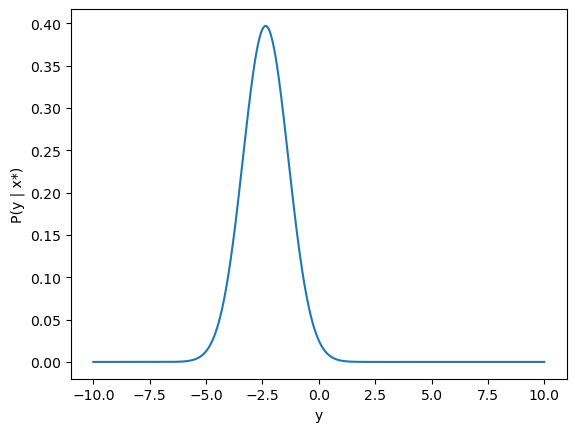

In [45]:
#predizione di prova

x_star = np.array([1, 0.5, 0, 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0])
ygrid_norm = np.linspace(-10, 10, 1000)

mean_salary_in_usd= df['salary_in_usd'].mean()
std_salary_in_usd = df['salary_in_usd'].std()

pred1 = predictive_normal_glm(x_star, mod1_data, ygrid_norm)
ygrid=(ygrid_norm*std_salary_in_usd)+mean_salary_in_usd
plt.plot(ygrid_norm,pred1)
plt.xlabel('y')
plt.ylabel('P(y | x*)')






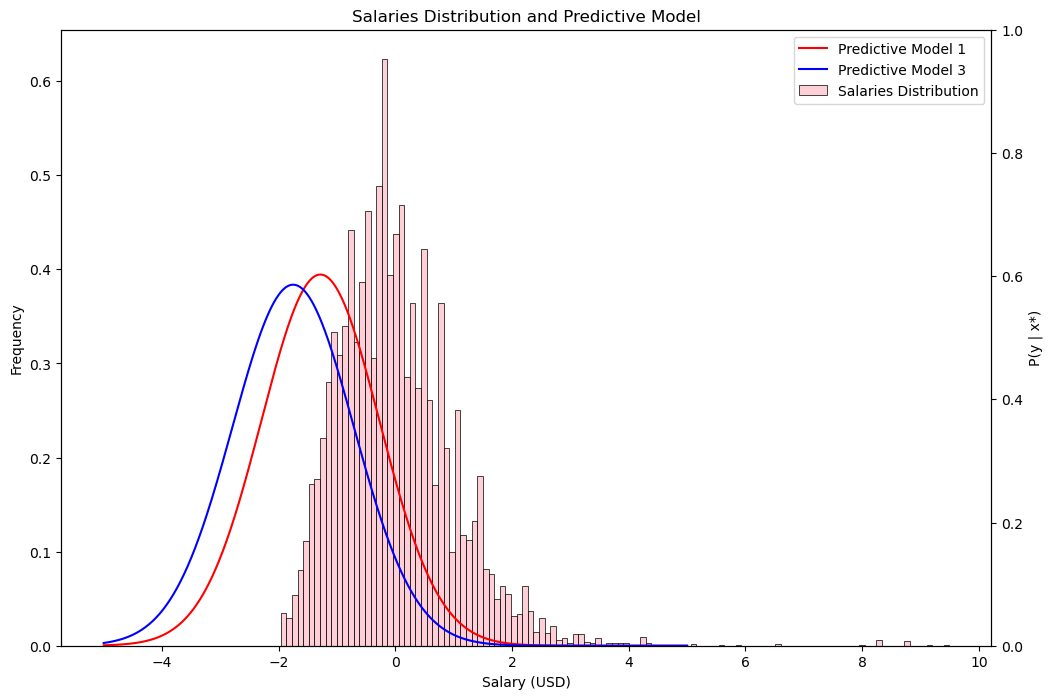

In [46]:
#Plotto due predizioni e salari standardizzati

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean_salary_in_usd= Data_Salary['salary_in_usd'].mean()
std_salary_in_usd = Data_Salary['salary_in_usd'].std()
Data_Salary['salary_in_usd'] = (Data_Salary['salary_in_usd'] - mean_salary_in_usd) / std_salary_in_usd
plt.figure(figsize=(12, 8))
sns.histplot(data=Data_Salary, x='salary_in_usd', color='pink', kde=False, stat="density", label='Salaries Distribution')
x_star = np.array([1, 0.5, 0, 0, 0, 1, 0, 0, 0, 0, 0])
ygrid_norm = np.linspace(-5, 5, 1000)
pred1 = predictive_normal_glm(x_star, mod1_data, ygrid_norm)
pred2 = predictive_normal_glmm(x_star, 2 , 0, mod3_data, ygrid_norm)


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(ygrid_norm, pred1, color='red', label='Predictive Model 1 ')
ax1.plot(ygrid_norm, pred2, color='blue', label='Predictive Model 3')
ax1.set_xlabel('Salary (USD)')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('P(y | x*)')
plt.title('Salaries Distribution and Predictive Model')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')
plt.savefig('combined_plot2.jpg')
plt.show()
